In [1]:
# 0. Hyper parameters for experiments 
num_of_samples = 50

num_of_pretrain_epochs = 800

num_of_train_epochs = 1000

G_lr = 1e-3
G_alpha, G_beta = 0.5, 0.0001
D_lr = 1e-4

In [2]:
# 1. Create the target black-box model, F
import AttackStyleTransformer
F = AttackStyleTransformer.utils.load_target_blackbox_model_MNIST()

In [3]:
print(F)

PytorchCNN_MNIST(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [4]:
# 2. Grab a few images for further experiments 
inputs, labels = AttackStyleTransformer.utils.get_experimental_input(num_of_samples, 'MNIST')

In [5]:
print(inputs.shape)
print(labels.shape)

torch.Size([50, 1, 28, 28])
torch.Size([50])


In [6]:
# 3.1 Construct the generator, G
import torch.optim as optim
G = AttackStyleTransformer.Generator()
G_loss_func = AttackStyleTransformer.generator_loss_function
G_optim = optim.Adam(G.parameters(), lr=G_lr)

In [7]:
print(G)

Generator(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [8]:
# 3.2 Pretrain G
interface = AttackStyleTransformer.ExperimentInterFace()
interface.pretrain_G(G, F, G_loss_func, G_optim, inputs, labels, num_of_pretrain_epochs, G_alpha, G_beta)

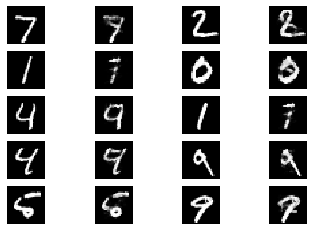

In [9]:
%matplotlib inline
AttackStyleTransformer.utils.display_images(G, inputs, 10)

In [10]:
# 4. Construct the discriminator, D
D = AttackStyleTransformer.Discriminator()
D_loss_func = AttackStyleTransformer.discriminator_loss_function
D_optim = optim.Adam(D.parameters(), lr=D_lr)

1 / 1000 , G_beta: 0.0001
2 / 1000 , G_beta: 0.0002
3 / 1000 , G_beta: 0.00030000000000000003
4 / 1000 , G_beta: 0.0004
5 / 1000 , G_beta: 0.0005
6 / 1000 , G_beta: 0.0006000000000000001
7 / 1000 , G_beta: 0.0007000000000000001
8 / 1000 , G_beta: 0.0008000000000000001
9 / 1000 , G_beta: 0.0009000000000000002
10 / 1000 , G_beta: 0.0010000000000000002
11 / 1000 , G_beta: 0.0011000000000000003
12 / 1000 , G_beta: 0.0012000000000000003
13 / 1000 , G_beta: 0.0013000000000000004
14 / 1000 , G_beta: 0.0014000000000000004
15 / 1000 , G_beta: 0.0015000000000000005
16 / 1000 , G_beta: 0.0016000000000000005
17 / 1000 , G_beta: 0.0017000000000000006
18 / 1000 , G_beta: 0.0018000000000000006
19 / 1000 , G_beta: 0.0019000000000000006
20 / 1000 , G_beta: 0.0020000000000000005
21 / 1000 , G_beta: 0.0021000000000000003
22 / 1000 , G_beta: 0.0022
23 / 1000 , G_beta: 0.0023
24 / 1000 , G_beta: 0.0024
25 / 1000 , G_beta: 0.0024999999999999996
26 / 1000 , G_beta: 0.0025999999999999994
27 / 1000 , G_beta: 0

204 / 1000 , G_beta: 0.020399999999999932
205 / 1000 , G_beta: 0.02049999999999993
206 / 1000 , G_beta: 0.02059999999999993
207 / 1000 , G_beta: 0.02069999999999993
208 / 1000 , G_beta: 0.02079999999999993
209 / 1000 , G_beta: 0.02089999999999993
210 / 1000 , G_beta: 0.02099999999999993
211 / 1000 , G_beta: 0.021099999999999928
212 / 1000 , G_beta: 0.021199999999999927
213 / 1000 , G_beta: 0.021299999999999927
214 / 1000 , G_beta: 0.021399999999999926
215 / 1000 , G_beta: 0.021499999999999925
216 / 1000 , G_beta: 0.021599999999999925
217 / 1000 , G_beta: 0.021699999999999924
218 / 1000 , G_beta: 0.021799999999999924
219 / 1000 , G_beta: 0.021899999999999923
220 / 1000 , G_beta: 0.021999999999999922
221 / 1000 , G_beta: 0.022099999999999922
222 / 1000 , G_beta: 0.02219999999999992
223 / 1000 , G_beta: 0.02229999999999992
224 / 1000 , G_beta: 0.02239999999999992
225 / 1000 , G_beta: 0.02249999999999992
226 / 1000 , G_beta: 0.02259999999999992
227 / 1000 , G_beta: 0.022699999999999918
228

403 / 1000 , G_beta: 0.04030000000000013
404 / 1000 , G_beta: 0.04040000000000013
405 / 1000 , G_beta: 0.04050000000000013
406 / 1000 , G_beta: 0.040600000000000136
407 / 1000 , G_beta: 0.04070000000000014
408 / 1000 , G_beta: 0.04080000000000014
409 / 1000 , G_beta: 0.040900000000000145
410 / 1000 , G_beta: 0.04100000000000015
411 / 1000 , G_beta: 0.04110000000000015
412 / 1000 , G_beta: 0.04120000000000015
413 / 1000 , G_beta: 0.041300000000000156
414 / 1000 , G_beta: 0.04140000000000016
415 / 1000 , G_beta: 0.04150000000000016
416 / 1000 , G_beta: 0.041600000000000165
417 / 1000 , G_beta: 0.04170000000000017
418 / 1000 , G_beta: 0.04180000000000017
419 / 1000 , G_beta: 0.04190000000000017
420 / 1000 , G_beta: 0.042000000000000176
421 / 1000 , G_beta: 0.04210000000000018
422 / 1000 , G_beta: 0.04220000000000018
423 / 1000 , G_beta: 0.042300000000000185
424 / 1000 , G_beta: 0.04240000000000019
425 / 1000 , G_beta: 0.04250000000000019
426 / 1000 , G_beta: 0.04260000000000019
427 / 1000

602 / 1000 , G_beta: 0.0602000000000007
603 / 1000 , G_beta: 0.0603000000000007
604 / 1000 , G_beta: 0.0604000000000007
605 / 1000 , G_beta: 0.060500000000000706
606 / 1000 , G_beta: 0.06060000000000071
607 / 1000 , G_beta: 0.06070000000000071
608 / 1000 , G_beta: 0.060800000000000715
609 / 1000 , G_beta: 0.06090000000000072
610 / 1000 , G_beta: 0.06100000000000072
611 / 1000 , G_beta: 0.06110000000000072
612 / 1000 , G_beta: 0.061200000000000726
613 / 1000 , G_beta: 0.06130000000000073
614 / 1000 , G_beta: 0.06140000000000073
615 / 1000 , G_beta: 0.061500000000000735
616 / 1000 , G_beta: 0.06160000000000074
617 / 1000 , G_beta: 0.06170000000000074
618 / 1000 , G_beta: 0.06180000000000074
619 / 1000 , G_beta: 0.061900000000000746
620 / 1000 , G_beta: 0.06200000000000075
621 / 1000 , G_beta: 0.06210000000000075
622 / 1000 , G_beta: 0.062200000000000755
623 / 1000 , G_beta: 0.06230000000000076
624 / 1000 , G_beta: 0.06240000000000076
625 / 1000 , G_beta: 0.06250000000000076
626 / 1000 , 

803 / 1000 , G_beta: 0.08030000000000127
804 / 1000 , G_beta: 0.08040000000000128
805 / 1000 , G_beta: 0.08050000000000128
806 / 1000 , G_beta: 0.08060000000000128
807 / 1000 , G_beta: 0.08070000000000128
808 / 1000 , G_beta: 0.08080000000000129
809 / 1000 , G_beta: 0.08090000000000129
810 / 1000 , G_beta: 0.0810000000000013
811 / 1000 , G_beta: 0.0811000000000013
812 / 1000 , G_beta: 0.0812000000000013
813 / 1000 , G_beta: 0.0813000000000013
814 / 1000 , G_beta: 0.0814000000000013
815 / 1000 , G_beta: 0.08150000000000131
816 / 1000 , G_beta: 0.08160000000000131
817 / 1000 , G_beta: 0.08170000000000131
818 / 1000 , G_beta: 0.08180000000000132
819 / 1000 , G_beta: 0.08190000000000132
820 / 1000 , G_beta: 0.08200000000000132
821 / 1000 , G_beta: 0.08210000000000132
822 / 1000 , G_beta: 0.08220000000000133
823 / 1000 , G_beta: 0.08230000000000133
824 / 1000 , G_beta: 0.08240000000000133
825 / 1000 , G_beta: 0.08250000000000134
826 / 1000 , G_beta: 0.08260000000000134
827 / 1000 , G_beta: 

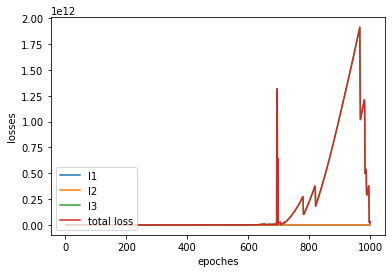

In [11]:
# 5. Train between G and D alternatively 
interface.run(F, G, D, G_loss_func, D_loss_func, G_optim, D_optim, num_of_train_epochs, inputs, labels, G_alpha, G_beta)

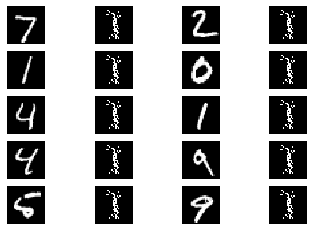

In [12]:
%matplotlib inline
AttackStyleTransformer.utils.display_images(G, inputs, 10)

In [13]:
misclassification_ratio = AttackStyleTransformer.utils.get_misclassification_ratio(F, G, inputs, labels)
print('mis-classification ratio of G:', misclassification_ratio)

mis-classification ratio of G: 0.84
